# Macro Finance - Homework 2
- Canberk Tahil
- Matheus Raka Pradnnyatama
- Oakley Liu

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import gmean

# The code is written with the help of OpenAI's Chatgpt.com.

# Question 2

In [2]:
# SPX Total Return Index (Source: BBG)
filepath_rawdata = f'./data/spx_totret_1995_daily.xlsx'
spx_index = pd.read_excel(filepath_rawdata, sheet_name = 'Worksheet')
spx_index = spx_index.rename(columns={'TOT_RETURN_INDEX_GROSS_DVDS': 'spx_index'}).dropna() # Drop Missing Data
display(spx_index.head())

,Date,spx_index
0,1994-12-30,575.70
1,1995-01-03,575.52
2,1995-01-04,577.69
3,1995-01-05,577.30
4,1995-01-06,577.72


In [3]:
# Effective Fed Funds Rate
# Source: https://fred.stlouisfed.org/series/DFF

filepath_rawdata = f'./data/EFFR_1995.xlsx'
fed_funds = pd.read_excel(filepath_rawdata, sheet_name='Data')
fed_funds = fed_funds.dropna()
display(fed_funds.head())

# Merge the two datasets
df_spx_fedfunds = pd.merge(spx_index, fed_funds, on=['Date'], how='inner')
display(df_spx_fedfunds.head())

,Date,EFFR
0,1995-01-01,4.94
1,1995-01-02,4.94
2,1995-01-03,5.98
3,1995-01-04,6.59
4,1995-01-05,5.72


,Date,spx_index,EFFR
0,1995-01-03,575.52,5.98
1,1995-01-04,577.69,6.59
2,1995-01-05,577.30,5.72
3,1995-01-06,577.72,5.52
4,1995-01-09,577.98,5.52


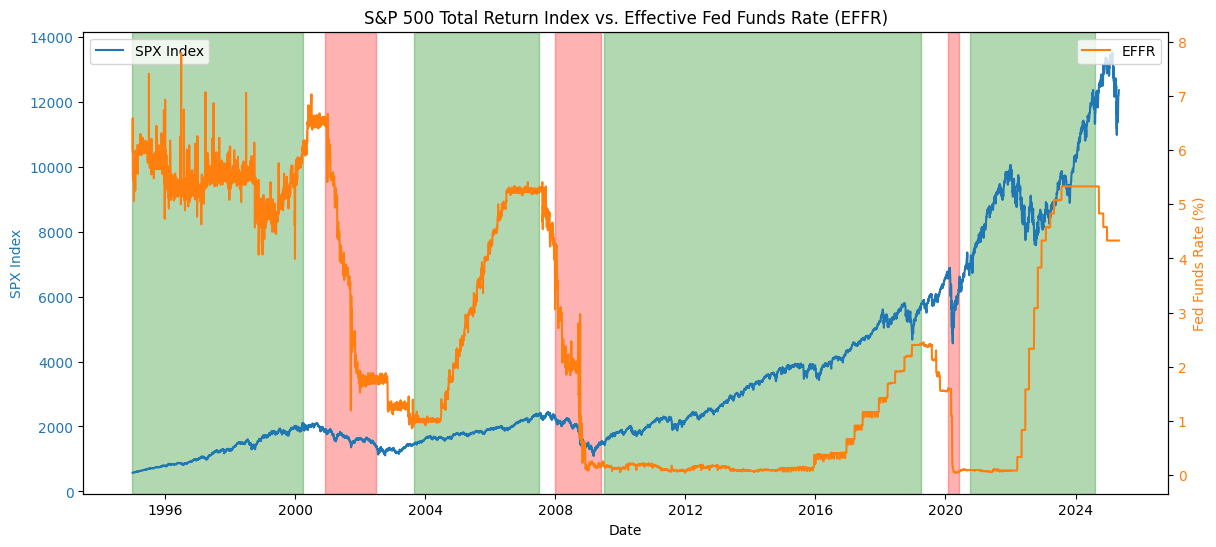

In [4]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# First y-axis
ax1.plot(df_spx_fedfunds['Date'], df_spx_fedfunds['spx_index'], color='tab:blue', label='SPX Index')
ax1.set_xlabel('Date')
ax1.set_ylabel('SPX Index', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend();

# Second y-axis
ax2 = ax1.twinx()
ax2.plot(df_spx_fedfunds['Date'], df_spx_fedfunds['EFFR'], color='tab:orange', label='EFFR')
ax2.set_ylabel('Fed Funds Rate (%)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.legend();

# Highlight
ax1.axvspan(pd.to_datetime('2000-12-01'), pd.to_datetime('2002-07-01'), color='red', alpha=0.3)
ax1.axvspan(pd.to_datetime('2008-01-01'), pd.to_datetime('2009-06-01'), color='red', alpha=0.3)
ax1.axvspan(pd.to_datetime('2020-01-30'), pd.to_datetime('2020-06-01'), color='red', alpha=0.3)

ax1.axvspan(pd.to_datetime('1995-01-01'), pd.to_datetime('2000-04-01'), color='green', alpha=0.3)
ax1.axvspan(pd.to_datetime('2003-09-01'), pd.to_datetime('2007-07-01'), color='green', alpha=0.3)
ax1.axvspan(pd.to_datetime('2009-07-01'), pd.to_datetime('2019-04-01'), color='green', alpha=0.3)
ax1.axvspan(pd.to_datetime('2020-10-01'), pd.to_datetime('2024-08-01'), color='green', alpha=0.3)

plt.title('S&P 500 Total Return Index vs. Effective Fed Funds Rate (EFFR)')
plt.grid(False);
plt.show();

In [5]:
# UST 30Y

filepath_rawdata = f'./data/UST_30Y_1995.xlsx'
ust_30y = pd.read_excel(filepath_rawdata, sheet_name='Data')
ust_30y = ust_30y.rename(columns={'observation_date': 'Date'}).dropna() 
ust_30y = ust_30y.rename(columns={'DGS30': 'UST_30Y'})
display(ust_30y.head())

# Merge the two datasets
df_fedfunds_ust = pd.merge(fed_funds, ust_30y, on=['Date'], how='inner')
display(df_fedfunds_ust.head())

,Date,UST_30Y
0,1995-01-03,7.93
1,1995-01-04,7.85
2,1995-01-05,7.91
3,1995-01-06,7.87
4,1995-01-09,7.90


,Date,EFFR,UST_30Y
0,1995-01-03,5.98,7.93
1,1995-01-04,6.59,7.85
2,1995-01-05,5.72,7.91
3,1995-01-06,5.52,7.87
4,1995-01-09,5.52,7.90


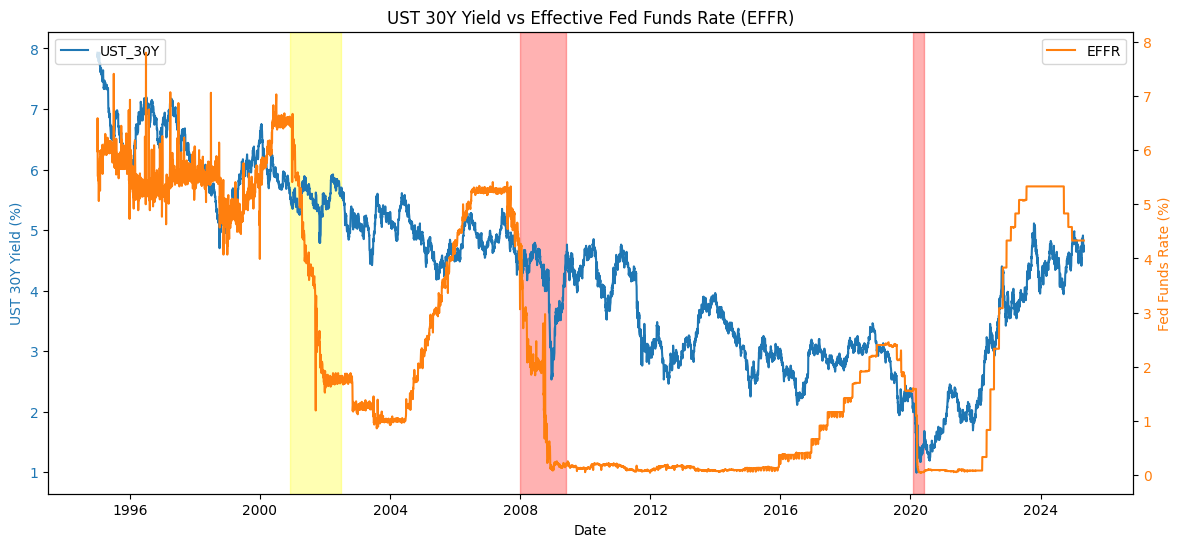

In [6]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# First y-axis
ax1.plot(df_fedfunds_ust['Date'], df_fedfunds_ust['UST_30Y'], color='tab:blue', label='UST_30Y')
ax1.set_xlabel('Date')
ax1.set_ylabel('UST 30Y Yield (%)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# Second y-axis
ax2 = ax1.twinx()
ax2.plot(df_fedfunds_ust['Date'], df_fedfunds_ust['EFFR'], color='tab:orange', label='EFFR')
ax2.set_ylabel('Fed Funds Rate (%)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.legend(loc='upper right')

# Highlight
ax1.axvspan(pd.to_datetime('2000-12-01'), pd.to_datetime('2002-07-01'), color='yellow', alpha=0.3)
ax1.axvspan(pd.to_datetime('2008-01-01'), pd.to_datetime('2009-06-01'), color='red', alpha=0.3)
ax1.axvspan(pd.to_datetime('2020-01-30'), pd.to_datetime('2020-06-01'), color='red', alpha=0.3)

plt.title('UST 30Y Yield vs Effective Fed Funds Rate (EFFR)')
plt.grid(False);
#plt.tight_layout()
plt.show();

# Question 4: Macro Variables
- Interest Rate (measured using the US Effective FFR)
- Growth (measured using the US Industrial Production)

,Date,Interest_Rate
0,1995-01-01,5.53
1,1995-02-01,5.92
2,1995-03-01,5.98
3,1995-04-01,6.05
4,1995-05-01,6.01


,Date,Interest_Rate
359,2024-12-01,4.48
360,2025-01-01,4.33
361,2025-02-01,4.33
362,2025-03-01,4.33
363,2025-04-01,4.33


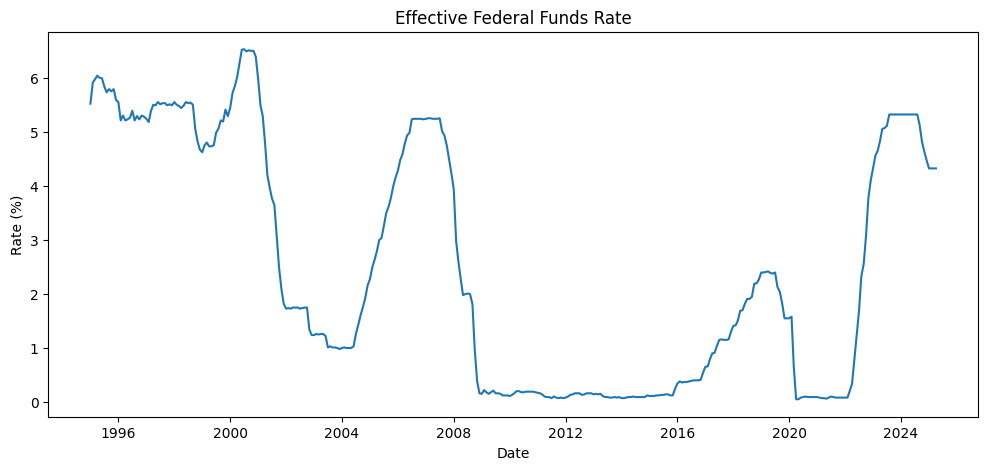

In [7]:
# Effective Fed Funds Rate

filepath_rawdata = f'./data/effr_monthly.xlsx'
fed_funds = pd.read_excel(filepath_rawdata, sheet_name='Monthly')
fed_funds = fed_funds.rename(columns={'FEDFUNDS': 'Interest_Rate'})
fed_funds = fed_funds.dropna()
display(fed_funds.head())
display(fed_funds.tail())

plt.figure(figsize=(12, 5))
plt.plot(fed_funds['Date'], fed_funds['Interest_Rate'], '-')
plt.title('Effective Federal Funds Rate')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.show()

# US Industrial Production Index

,Date,Production_Index
0,1995-01-31,71.2635
1,1995-02-28,71.1758
2,1995-03-31,71.2796
3,1995-04-30,71.1538
4,1995-05-31,71.4997


,Date,Production_Index
358,2024-11-30,101.9619
359,2024-12-31,103.1177
360,2025-01-31,103.3418
361,2025-02-28,104.2202
362,2025-03-31,103.8892


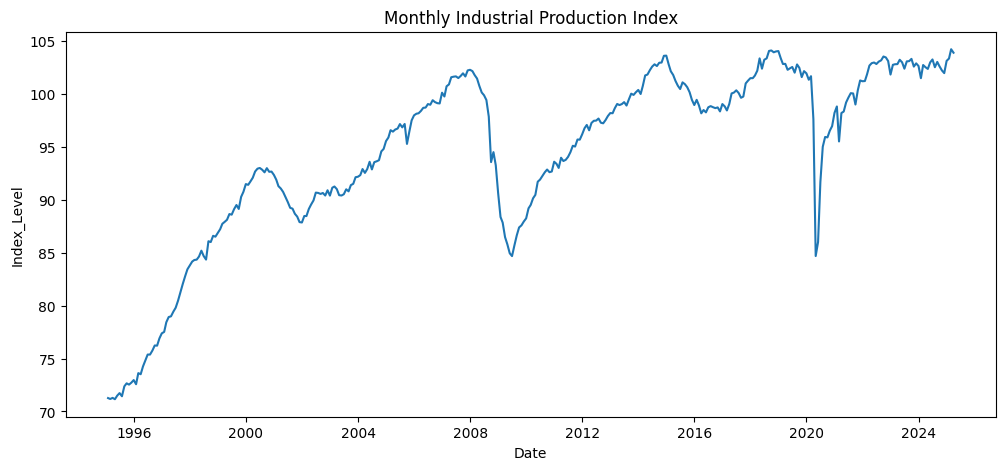

In [8]:
# US Industrial Production Index

filepath_rawdata = f'./data/industrial_production_monthly.xlsx'
df_prod_index = pd.read_excel(filepath_rawdata, sheet_name='Data').dropna() 
df_prod_index = df_prod_index.drop(columns={'TOT_RETURN_INDEX_GROSS_DVDS'})
df_prod_index = df_prod_index.rename(columns={'PX_LAST': 'Production_Index'})
display(df_prod_index.head())
display(df_prod_index.tail())

plt.figure(figsize=(12, 5))
plt.plot(df_prod_index['Date'], df_prod_index['Production_Index'], '-')
plt.title('Monthly Industrial Production Index')
plt.xlabel('Date')
plt.ylabel('Index_Level')
plt.show()

# Question 5: Defining Macro Regime

In [9]:
# Merge the two datasets
df_macro_variables = fed_funds.copy()
df_macro_variables['Production_Index'] = df_prod_index['Production_Index']
df_macro_variables = df_macro_variables.dropna()
display(df_macro_variables.head())
display(df_macro_variables.tail())

,Date,Interest_Rate,Production_Index
0,1995-01-01,5.53,71.2635
1,1995-02-01,5.92,71.1758
2,1995-03-01,5.98,71.2796
3,1995-04-01,6.05,71.1538
4,1995-05-01,6.01,71.4997


,Date,Interest_Rate,Production_Index
358,2024-11-01,4.64,101.9619
359,2024-12-01,4.48,103.1177
360,2025-01-01,4.33,103.3418
361,2025-02-01,4.33,104.2202
362,2025-03-01,4.33,103.8892


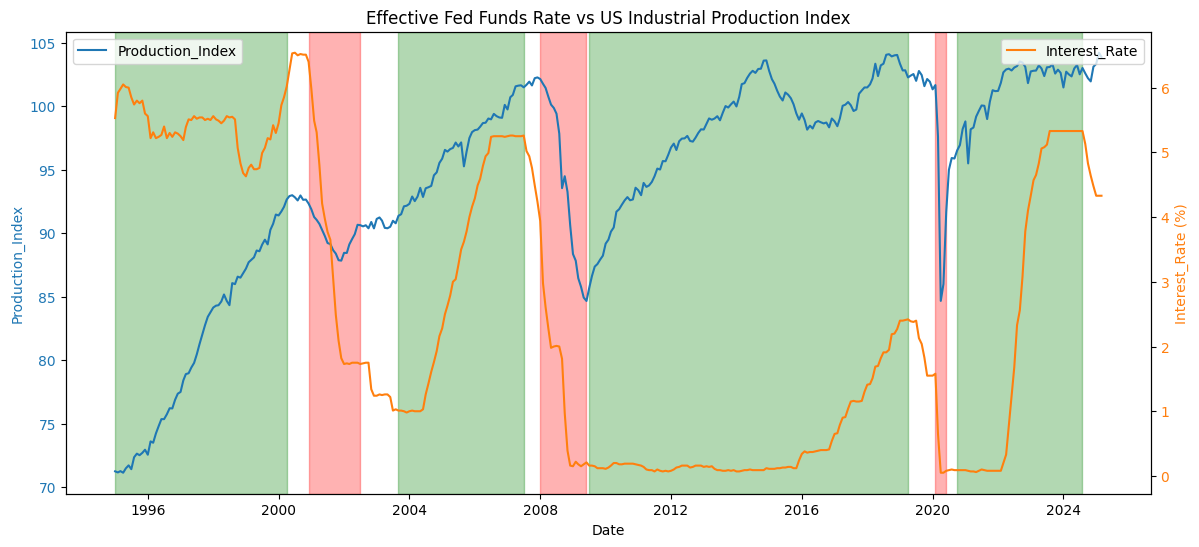

In [10]:
df = df_macro_variables

fig, ax1 = plt.subplots(figsize=(14, 6))

# First y-axis
ax1.plot(df['Date'], df['Production_Index'], color='tab:blue', label='Production_Index')
ax1.set_xlabel('Date')
ax1.set_ylabel('Production_Index', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend();

# Second y-axis
ax2 = ax1.twinx()
ax2.plot(df['Date'], df['Interest_Rate'], color='tab:orange', label='Interest_Rate')
ax2.set_ylabel('Interest_Rate (%)', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.legend();

# Highlight
ax1.axvspan(pd.to_datetime('2000-12-01'), pd.to_datetime('2002-07-01'), color='red', alpha=0.3)
ax1.axvspan(pd.to_datetime('2008-01-01'), pd.to_datetime('2009-06-01'), color='red', alpha=0.3)
ax1.axvspan(pd.to_datetime('2020-01-30'), pd.to_datetime('2020-06-01'), color='red', alpha=0.3)

ax1.axvspan(pd.to_datetime('1995-01-01'), pd.to_datetime('2000-04-01'), color='green', alpha=0.3)
ax1.axvspan(pd.to_datetime('2003-09-01'), pd.to_datetime('2007-07-01'), color='green', alpha=0.3)
ax1.axvspan(pd.to_datetime('2009-07-01'), pd.to_datetime('2019-04-01'), color='green', alpha=0.3)
ax1.axvspan(pd.to_datetime('2020-10-01'), pd.to_datetime('2024-08-01'), color='green', alpha=0.3)

plt.title('Effective Fed Funds Rate vs US Industrial Production Index')
plt.grid(False);
plt.show();

In [11]:
# Create the macro regimes
regimes = {
    'Regime_1': ['Boom', '1995-01-01', '2000-04-01'],
    'Regime_2': ['Bust', '2000-12-01', '2002-07-01'],
    'Regime_3': ['Boom', '2003-09-01', '2007-07-01'],
    'Regime_4': ['Bust', '2008-01-01', '2009-06-01'],
    'Regime_5': ['Boom', '2009-07-01', '2019-04-01'],
    'Regime_6': ['Bust', '2020-01-30', '2020-06-01'],
    'Regime_7': ['Boom', '2020-10-01', '2024-08-01']
}

# Convert to DataFrame
df_regimes = pd.DataFrame.from_dict(regimes, orient='index', columns=['Cycle', 'Start_Date', 'End_Date'])
df_regimes.index.name = 'Regime'
display(df_regimes)


,Cycle,Start_Date,End_Date
Regime,,,
Regime_1,Boom,1995-01-01,2000-04-01
Regime_2,Bust,2000-12-01,2002-07-01
Regime_3,Boom,2003-09-01,2007-07-01
Regime_4,Bust,2008-01-01,2009-06-01
Regime_5,Boom,2009-07-01,2019-04-01
Regime_6,Bust,2020-01-30,2020-06-01
Regime_7,Boom,2020-10-01,2024-08-01


# Question 6

In [12]:
# SPX Total Return Index
filepath_rawdata = f'./data/spx_totret_1995_daily.xlsx'
spx_tot_return = pd.read_excel(filepath_rawdata, sheet_name = 'Worksheet')
spx_tot_return = spx_tot_return.rename(columns={'TOT_RETURN_INDEX_GROSS_DVDS': 'Total_Return_Index'}).dropna() # Drop Missing Data

# SPX Total Return
total_return_index = spx_tot_return.set_index('Date')
df_return = total_return_index.pct_change().dropna()
df_return = df_return.rename(columns={'Total_Return_Index': 'Total_Return'})
df_return = df_return.reset_index()
df_spx_tot_return = df_return.copy()
display(df_spx_tot_return.head())

# Compute mean Total_Return for each regime
mean_returns = []
df_return = df_spx_tot_return

# For each row in df_regimes
for _, row in df_regimes.iterrows():
    start_date = row['Start_Date']
    end_date = row['End_Date']
    # Filter only in between regime dates
    filter_data = df_return[(df_return['Date'] >= start_date) & (df_return['Date'] <= end_date)]
    
    # Annualized Geometric mean (in percent)
    data = filter_data['Total_Return']
    mean_return = (gmean(1 + data) - 1) * 252 * 100 # In percent
    mean_returns.append(mean_return)

# Add to the DataFrame
df_regimes['Mean_Return_Equities'] = mean_returns
display(df_regimes)

,Date,Total_Return
0,1995-01-03,-0.000313
1,1995-01-04,0.003771
2,1995-01-05,-0.000675
3,1995-01-06,0.000728
4,1995-01-09,0.000450


,Cycle,Start_Date,End_Date,Mean_Return_Equities
Regime,,,,
Regime_1,Boom,1995-01-01,2000-04-01,24.311561
Regime_2,Bust,2000-12-01,2002-07-01,-18.043509
Regime_3,Boom,2003-09-01,2007-07-01,12.273408
Regime_4,Bust,2008-01-01,2009-06-01,-28.815697
Regime_5,Boom,2009-07-01,2019-04-01,13.774057
Regime_6,Bust,2020-01-30,2020-06-01,-18.167318
Regime_7,Boom,2020-10-01,2024-08-01,14.152678


In [13]:
# 30Y UST Total Return Index
# SPBDU3BT Index = S&P U.S. Treasury Bond Current 30-Year Total Return Index (from BBG)

filepath_rawdata = f'./data/UST30Y_totret_1995_d.xlsx'
df_ust_30yr_tot_return = pd.read_excel(filepath_rawdata, sheet_name='Worksheet')
df_ust_30yr_tot_return = df_ust_30yr_tot_return.rename(columns={'TOT_RETURN_INDEX_GROSS_DVDS': 'Total_Return_Index'}).dropna() # Drop Missing Data

# Total Return 
total_return_index = df_ust_30yr_tot_return.set_index('Date')
df_return = total_return_index.pct_change().dropna()
df_return = df_return.rename(columns={'Total_Return_Index': 'Total_Return'})
df_return = df_return.reset_index()
df_ust_return = df_return.copy()
display(df_ust_return.head())

# Compute mean Total_Return for each regime
mean_returns = []
df_return = df_ust_return
for _, row in df_regimes.iterrows():
    start_date = row['Start_Date']
    end_date = row['End_Date']
    filter_data = df_return[(df_return['Date'] >= start_date) & (df_return['Date'] <= end_date)]
    data = filter_data['Total_Return']
    mean_return = (gmean(1 + data) - 1) * 252 * 100 # In percent
    mean_returns.append(mean_return)
df_regimes['Mean_Return_GovBond'] = mean_returns
display(df_regimes)

,Date,Total_Return
0,1995-01-03,-0.004535
1,1995-01-04,0.009643
2,1995-01-05,-0.006548
3,1995-01-06,0.005182
4,1995-01-09,-0.003010


,Cycle,Start_Date,End_Date,Mean_Return_Equities,Mean_Return_GovBond
Regime,,,,,
Regime_1,Boom,1995-01-01,2000-04-01,24.311561,8.975917
Regime_2,Bust,2000-12-01,2002-07-01,-18.043509,5.422993
Regime_3,Boom,2003-09-01,2007-07-01,12.273408,4.408390
Regime_4,Bust,2008-01-01,2009-06-01,-28.815697,2.410706
Regime_5,Boom,2009-07-01,2019-04-01,13.774057,5.837526
Regime_6,Bust,2020-01-30,2020-06-01,-18.167318,40.748324
Regime_7,Boom,2020-10-01,2024-08-01,14.152678,-13.008112


In [14]:
# High Yield Corporate Bond Total Return Index 
# LF98TRUU Index (grabbed directly from Bloomberg)
filepath_rawdata = f'./data/HY_totret_1995_daily.xlsx'
df_hy_bond = pd.read_excel(filepath_rawdata, sheet_name = 'Worksheet')
df_hy_bond = df_hy_bond.rename(columns={'TOT_RETURN_INDEX_GROSS_DVDS': 'Total_Return_Index'}).dropna() # Drop Missing Data

# High Yield Corporate Bond Total Return
total_return_index = df_hy_bond.set_index('Date')
df_return = total_return_index.pct_change().dropna()
df_return = df_return.rename(columns={'Total_Return_Index': 'Total_Return'})
df_return = df_return.reset_index()
df_hy_tot_return = df_return.copy()
display(df_hy_tot_return.head())

# Compute mean Total_Return for each regime
mean_returns = []
df_return = df_hy_tot_return
for _, row in df_regimes.iterrows():
    start_date = row['Start_Date']
    end_date = row['End_Date']
    filter_data = df_return[(df_return['Date'] >= start_date) & (df_return['Date'] <= end_date)]
    data = filter_data['Total_Return']
    mean_return = (gmean(1 + data) - 1) * 252 * 100 # In percent
    mean_returns.append(mean_return)
df_regimes['Mean_Return_Credit'] = mean_returns
display(df_regimes)

,Date,Total_Return
0,2025-04-24,-0.002868
1,2025-04-23,-0.002843
2,2025-04-22,-0.006729
3,2025-04-21,-0.003889
4,2025-04-18,0.003552


,Cycle,Start_Date,End_Date,Mean_Return_Equities,Mean_Return_GovBond,Mean_Return_Credit
Regime,,,,,,
Regime_1,Boom,1995-01-01,2000-04-01,24.311561,8.975917,-20.725145
Regime_2,Bust,2000-12-01,2002-07-01,-18.043509,5.422993,-1.500121
Regime_3,Boom,2003-09-01,2007-07-01,12.273408,4.408390,-9.246226
Regime_4,Bust,2008-01-01,2009-06-01,-28.815697,2.410706,3.612057
Regime_5,Boom,2009-07-01,2019-04-01,13.774057,5.837526,-8.852057
Regime_6,Bust,2020-01-30,2020-06-01,-18.167318,40.748324,11.579947
Regime_7,Boom,2020-10-01,2024-08-01,14.152678,-13.008112,-4.203101


In [15]:
# SPGSCI Index: (Total Return Index)

filepath_rawdata = f'./data/gsci_totret_1995_d.xlsx'
gsci_tot_return = pd.read_excel(filepath_rawdata, sheet_name = 'Worksheet')
gsci_tot_return = gsci_tot_return.rename(columns={'TOT_RETURN_INDEX_GROSS_DVDS': 'Total_Return_Index'}).dropna()

# GSCI Total Return
total_return_index = gsci_tot_return.set_index('Date')
df_return = total_return_index.pct_change().dropna()
df_return = df_return.rename(columns={'Total_Return_Index': 'Total_Return'})
df_return = df_return.reset_index()
df_gsci_tot_return = df_return.copy()
display(df_gsci_tot_return.head())

# Compute mean Total_Return for each regime
mean_returns = []
df_return = df_gsci_tot_return
for _, row in df_regimes.iterrows():
    start_date = row['Start_Date']
    end_date = row['End_Date']
    filter_data = df_return[(df_return['Date'] >= start_date) & (df_return['Date'] <= end_date)]
    data = filter_data['Total_Return']
    mean_return = (gmean(1 + data) - 1) * 252 * 100 # In percent
    mean_returns.append(mean_return)
df_regimes['Mean_Return_Commodities'] = mean_returns
display(df_regimes)

,Date,Total_Return
0,1995-01-03,-0.011508
1,1995-01-04,-0.004513
2,1995-01-05,0.002839
3,1995-01-06,-0.007914
4,1995-01-09,-0.009234


,Cycle,Start_Date,End_Date,Mean_Return_Equities,Mean_Return_GovBond,Mean_Return_Credit,Mean_Return_Commodities
Regime,,,,,,,
Regime_1,Boom,1995-01-01,2000-04-01,24.311561,8.975917,-20.725145,2.565516
Regime_2,Bust,2000-12-01,2002-07-01,-18.043509,5.422993,-1.500121,-14.636385
Regime_3,Boom,2003-09-01,2007-07-01,12.273408,4.408390,-9.246226,18.334526
Regime_4,Bust,2008-01-01,2009-06-01,-28.815697,2.410706,3.612057,-20.226810
Regime_5,Boom,2009-07-01,2019-04-01,13.774057,5.837526,-8.852057,-0.242446
Regime_6,Bust,2020-01-30,2020-06-01,-18.167318,40.748324,11.579947,-77.071237
Regime_7,Boom,2020-10-01,2024-08-01,14.152678,-13.008112,-4.203101,11.535715


# Risk Parity
## Question 8

In [16]:
# Date Boundaries
start_date = '2000-01-01'
end_date = '2019-12-31'
    
# SPX Total Return Index
filepath_rawdata = f'./data/spx_totret_1995_weekly.xlsx'
spx_weekly = pd.read_excel(filepath_rawdata, sheet_name = 'Worksheet').dropna() # Drop Missing Data
spx_weekly = spx_weekly.rename(columns={'TOT_RETURN_INDEX_GROSS_DVDS': 'Total_Return_Index'})
#display(spx_weekly.head())

# SPX Total Return
total_return_index = spx_weekly.set_index('Date')
df_return = total_return_index.pct_change().dropna()
df_return = df_return.rename(columns={'Total_Return_Index': 'Return_Equity'})
df_return = df_return.reset_index()

# Filter only relevant dates
df_return = df_return[(df_return['Date'] >= start_date) & (df_return['Date'] <= end_date)]

df_spx_return_weekly = df_return.copy()

display(df_spx_return_weekly.head())
display(df_spx_return_weekly.tail())

,Date,Return_Equity
260,2000-01-07,-0.018586
261,2000-01-14,0.016539
262,2000-01-21,-0.016180
263,2000-01-28,-0.056149
264,2000-02-04,0.047436


,Date,Return_Equity
1298,2019-11-29,0.010358
1299,2019-12-06,0.002066
1300,2019-12-13,0.007723
1301,2019-12-20,0.016784
1302,2019-12-27,0.006014


In [17]:
# Date Boundaries
start_date = '2000-01-01'
end_date = '2019-12-31'

# US HY Bond Total Return Index
filepath_rawdata = f'./data/HY_totret_1995_weekly.xlsx'
bonds_weekly = pd.read_excel(filepath_rawdata, sheet_name = 'Worksheet').dropna() # Drop Missing Data
bonds_weekly = bonds_weekly.rename(columns={'TOT_RETURN_INDEX_GROSS_DVDS': 'Total_Return_Index'})
#display(bonds_weekly.head())

# US HY Bond Total Return
total_return_index = bonds_weekly.set_index('Date')
df_return = total_return_index.pct_change().dropna()
df_return = df_return.rename(columns={'Total_Return_Index': 'Return_Bond'})
df_return = df_return.reset_index()

# Filter only relevant dates
df_return = df_return[(df_return['Date'] >= start_date) & (df_return['Date'] <= end_date)]

df_bond_return_weekly = df_return.copy()
display(df_bond_return_weekly.head())
display(df_bond_return_weekly.tail())

,Date,Return_Bond
116,2000-01-07,-0.004679
117,2000-01-14,-0.001792
118,2000-01-21,-0.000513
119,2000-01-28,0.003098
120,2000-02-04,0.001243


,Date,Return_Bond
1154,2019-11-29,0.004242
1155,2019-12-06,0.003542
1156,2019-12-13,0.007562
1157,2019-12-20,0.006840
1158,2019-12-27,0.001845


In [18]:
# Merge the two datasets
df_stocks_bonds = pd.merge(df_spx_return_weekly, df_bond_return_weekly, on=['Date'], how='inner')
display(df_stocks_bonds.head())
display(df_stocks_bonds.tail())

# Compute correlation between the two columns
df = df_stocks_bonds
correlation = df['Return_Equity'].corr(df['Return_Bond'])
print(f"Correlation for period 2000 - 2019: {correlation * 100 :.2f}%")

,Date,Return_Equity,Return_Bond
0,2000-01-07,-0.018586,-0.004679
1,2000-01-14,0.016539,-0.001792
2,2000-01-21,-0.016180,-0.000513
3,2000-01-28,-0.056149,0.003098
4,2000-02-04,0.047436,0.001243


,Date,Return_Equity,Return_Bond
1038,2019-11-29,0.010358,0.004242
1039,2019-12-06,0.002066,0.003542
1040,2019-12-13,0.007723,0.007562
1041,2019-12-20,0.016784,0.006840
1042,2019-12-27,0.006014,0.001845


Correlation for period 2000 - 2019: 48.89%


# Question 8.b)

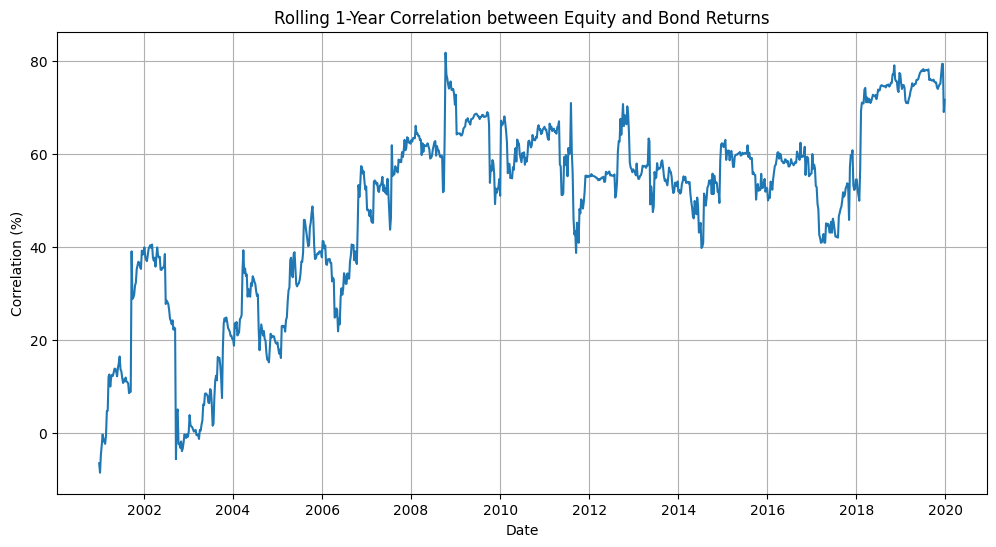

In [19]:
# Set rolling window size (52 weeks = 1 year)
window_size = 52

# Compute rolling 1-year correlation
df_stocks_bonds['Rolling_Correlation'] = (
    df_stocks_bonds['Return_Equity']
    .rolling(window=window_size)
    .corr(df_stocks_bonds['Return_Bond'])
)

# Drop NaNs introduced by rolling
df_rolling = df_stocks_bonds.dropna(subset=['Rolling_Correlation'])

# Plot the rolling correlation
plt.figure(figsize=(12, 6))
plt.plot(df_rolling['Date'], df_rolling['Rolling_Correlation'] * 100)
plt.title('Rolling 1-Year Correlation between Equity and Bond Returns')
plt.xlabel('Date')
plt.ylabel('Correlation (%)')
plt.grid(True)
# plt.tight_layout()
plt.show()

# Question 9. a) Risk Parity Fund - Asset Allocation

In [20]:
window_size = 52

df = df_stocks_bonds.copy()

# Compute the 1-year (52-week) rolling vol for each asset
df['Vol_Equity'] = df['Return_Equity'].rolling(window_size).std()
df['Vol_Bond'] = df['Return_Bond'].rolling(window_size).std()

# Compute inverse vol weights (unscaled)
# Higher vol --> Smaller weight
df['Inv_Vol_Equity'] = 1 / df['Vol_Equity'] 
df['Inv_Vol_Bond'] = 1 / df['Vol_Bond'] 

# Normalize to get total weight = 1 (fully allocated)
total_inv_vol = df['Inv_Vol_Equity'] + df['Inv_Vol_Bond']
df['Weight_Equity'] = df['Inv_Vol_Equity'] / total_inv_vol
df['Weight_Bond'] = df['Inv_Vol_Bond'] / total_inv_vol

# Average Allocation Over Time
avg_eq_weight = df['Weight_Equity'].mean()
avg_bd_weight = df['Weight_Bond'].mean()

print(f"Average Allocation for Equities: {avg_eq_weight:.2%}")
print(f"Average Allocation for Bonds:    {avg_bd_weight:.2%}")

# Drop the first (52) initial rows with NaN
df_risk_parity = df.dropna()

display(df_risk_parity.head())
display(df_risk_parity.tail())

Average Allocation for Equities: 26.71%
Average Allocation for Bonds:    73.29%


,Date,Return_Equity,Return_Bond,Rolling_Correlation,Vol_Equity,Vol_Bond,Inv_Vol_Equity,Inv_Vol_Bond,Weight_Equity,Weight_Bond
51,2000-12-29,0.011211,0.000155,-0.065283,0.031576,0.006885,31.669412,145.251389,0.179003,0.820997
52,2001-01-05,-0.016458,0.011467,-0.085629,0.031555,0.007083,31.690904,141.183376,0.183318,0.816682
53,2001-01-12,0.015721,0.021528,-0.046476,0.031546,0.007729,31.699806,129.376421,0.196800,0.803200
54,2001-01-19,0.018436,0.012128,-0.026745,0.031591,0.007921,31.654248,126.239597,0.200478,0.799522
55,2001-01-26,0.009319,0.013073,-0.003374,0.030626,0.008120,32.651981,123.159082,0.209561,0.790439


,Date,Return_Equity,Return_Bond,Rolling_Correlation,Vol_Equity,Vol_Bond,Inv_Vol_Equity,Inv_Vol_Bond,Weight_Equity,Weight_Bond
1038,2019-11-29,0.010358,0.004242,0.771071,0.020024,0.005904,49.940240,169.369721,0.227715,0.772285
1039,2019-12-06,0.002066,0.003542,0.793700,0.018809,0.005891,53.164809,169.748697,0.238500,0.761500
1040,2019-12-13,0.007723,0.007562,0.793706,0.018675,0.005942,53.546184,168.289960,0.241377,0.758623
1041,2019-12-20,0.016784,0.006840,0.690201,0.015480,0.004743,64.600160,210.818147,0.234553,0.765447
1042,2019-12-27,0.006014,0.001845,0.716369,0.015137,0.004739,66.063049,210.994014,0.238446,0.761554


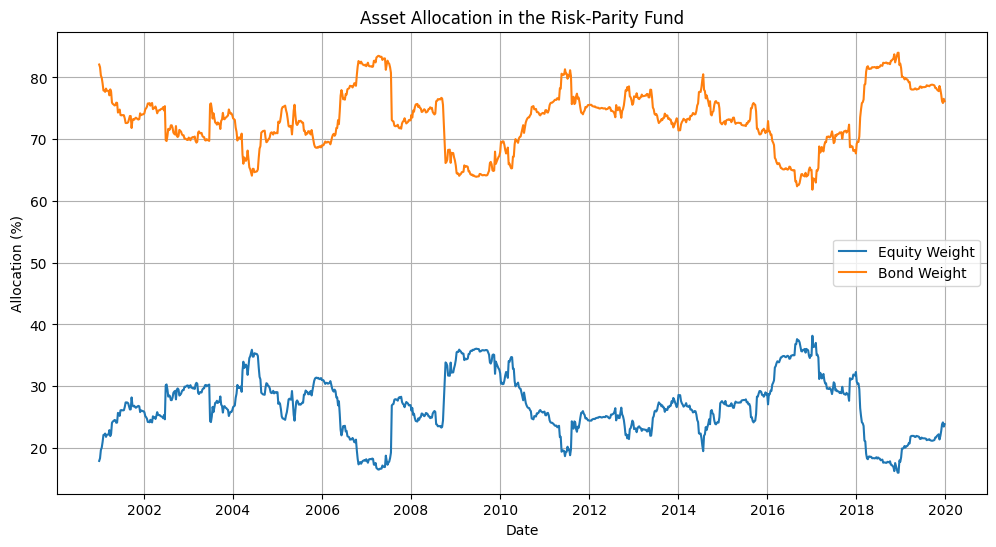

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df_risk_parity['Date'], df_risk_parity['Weight_Equity'] * 100, label='Equity Weight')
plt.plot(df_risk_parity['Date'], df_risk_parity['Weight_Bond'] * 100, label='Bond Weight')
plt.title('Asset Allocation in the Risk-Parity Fund')
plt.xlabel('Date')
plt.ylabel('Allocation (%)')
plt.legend()
plt.grid(True)
plt.show()

# Question 9. b) Risk Parity Fund - Volatility

In [22]:
window_size = 52

df = df_stocks_bonds.copy()

# Compute the 1-year (52-week) rolling vol for each asset
df['Vol_Equity'] = df['Return_Equity'].rolling(window_size).std()
df['Vol_Bond'] = df['Return_Bond'].rolling(window_size).std()

# Compute inverse vol weights (unscaled)
# Higher vol --> Smaller weight
df['Inv_Vol_Equity'] = 1 / df['Vol_Equity'] 
df['Inv_Vol_Bond'] = 1 / df['Vol_Bond'] 

# Normalize to get total weight = 1 (fully allocated)
total_inv_vol = df['Inv_Vol_Equity'] + df['Inv_Vol_Bond']
df['Weight_Equity'] = df['Inv_Vol_Equity'] / total_inv_vol
df['Weight_Bond'] = df['Inv_Vol_Bond'] / total_inv_vol

# Vol Computation 

ret_equity = df_risk_parity['Return_Equity']
ret_bond = df_risk_parity['Return_Bond']
ret_portfolio = df_risk_parity['Weight_Equity'] * ret_equity + df_risk_parity['Weight_Bond'] * ret_bond

# Store Portfolio Return
df_risk_parity['Portfolio_Return'] = ret_portfolio

# Rolling Vol of Portfolio Return
df_risk_parity['Vol_Portfolio'] = ret_portfolio.rolling(window_size).std()

# Rolling Covariances
df_risk_parity['Cov_Equity_Port'] = ret_equity.rolling(window_size).cov(ret_portfolio)
df_risk_parity['Cov_Bond_Port'] = ret_bond.rolling(window_size).cov(ret_portfolio)

# Compute Portfolio Variance
df_risk_parity['Var_Portfolio'] = df_risk_parity['Vol_Portfolio'] ** 2

# Risk Contributions as a percentage of Variance
# Weight times Cov / Var_Portfolio
df_risk_parity['Equity_Vol_Contribution'] = (df_risk_parity['Weight_Equity'] * df_risk_parity['Cov_Equity_Port'] /
                                             df_risk_parity['Var_Portfolio'])

df_risk_parity['Bond_Vol_Contribution'] = (df_risk_parity['Weight_Bond'] * df_risk_parity['Cov_Bond_Port'] /
                                             df_risk_parity['Var_Portfolio'])

# Total_Contribution should be 1 on average
df_risk_parity['Total_Contribution'] = (
    df_risk_parity['Equity_Vol_Contribution'] + df_risk_parity['Bond_Vol_Contribution']
)

# Drop the first (52) initial rows with NaN
df_risk_parity = df_risk_parity.dropna()
display(df_risk_parity.head())

,Date,Return_Equity,Return_Bond,Rolling_Correlation,Vol_Equity,Vol_Bond,Inv_Vol_Equity,Inv_Vol_Bond,Weight_Equity,Weight_Bond,Portfolio_Return,Vol_Portfolio,Cov_Equity_Port,Cov_Bond_Port,Var_Portfolio,Equity_Vol_Contribution,Bond_Vol_Contribution,Total_Contribution
102,2001-12-21,0.019668,-0.004086,0.383596,0.031086,0.010902,32.168745,91.728592,0.259640,0.740360,0.002082,0.013465,0.000344,0.000123,0.000181,0.492625,0.503361,0.995986
103,2001-12-28,0.014431,0.002373,0.385111,0.031116,0.010903,32.138141,91.721185,0.259473,0.740527,0.005502,0.013481,0.000345,0.000123,0.000182,0.492772,0.502893,0.995666
104,2002-01-04,0.010054,0.002533,0.399154,0.031087,0.010805,32.167961,92.546148,0.257934,0.742066,0.004473,0.013468,0.000348,0.000122,0.000181,0.494607,0.500482,0.995090
105,2002-01-11,-0.022580,0.008861,0.379573,0.031131,0.010469,32.122078,95.523350,0.251651,0.748349,0.000949,0.013169,0.000341,0.000114,0.000173,0.494341,0.492969,0.987309
106,2002-01-18,-0.015634,-0.001760,0.372202,0.031052,0.010347,32.204026,96.651006,0.249924,0.750076,-0.005228,0.013051,0.000337,0.000111,0.000170,0.493720,0.490479,0.984199


In [23]:
# Mean Total Contribution should be 1 (100%)
total_contribution_mean = df_risk_parity['Total_Contribution'].mean()
print(f"Mean Total Contribution: {total_contribution_mean:.0%}")

# Average Return of the Fund
Ret_Portfolio_weekly = df_risk_parity['Portfolio_Return'].mean()
print(f"Average Return of the Fund (weekly): {Ret_Portfolio_weekly:.2%}")
annual_factor = 52
Ret_Portfolio_annualized = Ret_Portfolio_weekly * annual_factor
print(f"Average Return of the Fund (annualized): {Ret_Portfolio_annualized:.2%}")

# Average Risk of the Fund 
Vol_Portfolio_weekly = df_risk_parity['Vol_Portfolio'].mean()
print(f"Average Risk of the Fund (weekly): {Vol_Portfolio_weekly:.2%}")
annual_factor = 52
Vol_Portfolio_annualized = Vol_Portfolio_weekly * np.sqrt(annual_factor)
print(f"Average Risk of the Fund (annualized): {Vol_Portfolio_annualized:.2%}")

# Average Contribution Over Time
avg_eq_contrib = df_risk_parity['Equity_Vol_Contribution'].mean()
avg_bd_contrib = df_risk_parity['Bond_Vol_Contribution'].mean()

print(f"Average Equity Vol Contribution: {avg_eq_contrib:.2%}")
print(f"Average Bond Vol Contribution:   {avg_bd_contrib:.2%}")

Mean Total Contribution: 99%
Average Return of the Fund (weekly): 0.16%
Average Return of the Fund (annualized): 8.08%
Average Risk of the Fund (weekly): 1.03%
Average Risk of the Fund (annualized): 7.41%
Average Equity Vol Contribution: 49.54%
Average Bond Vol Contribution:   49.42%


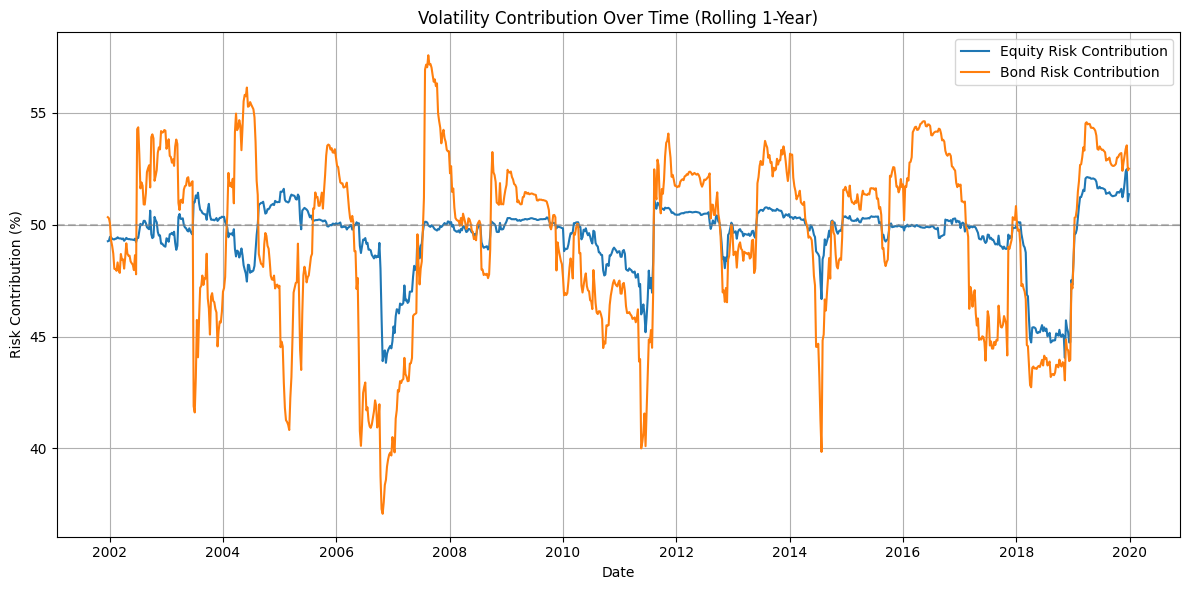

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df_risk_parity['Date'], df_risk_parity['Equity_Vol_Contribution'] * 100, label='Equity Risk Contribution')
plt.plot(df_risk_parity['Date'], df_risk_parity['Bond_Vol_Contribution'] * 100, label='Bond Risk Contribution')
plt.axhline(50, color='gray', linestyle='--', alpha=0.5)
plt.title('Volatility Contribution Over Time (Rolling 1-Year)')
plt.ylabel('Risk Contribution (%)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Question 10: From 2021 to Present

In [25]:
# Date Boundaries
start_date = '2019-01-01'
    
# SPX Total Return Index
filepath_rawdata = f'./data/spx_totret_1995_weekly.xlsx'
spx_weekly = pd.read_excel(filepath_rawdata, sheet_name = 'Worksheet').dropna() # Drop Missing Data
spx_weekly = spx_weekly.rename(columns={'TOT_RETURN_INDEX_GROSS_DVDS': 'Total_Return_Index'})
#display(spx_weekly.head())

# SPX Total Return
total_return_index = spx_weekly.set_index('Date')
df_return = total_return_index.pct_change().dropna()
df_return = df_return.rename(columns={'Total_Return_Index': 'Return_Equity'})
df_return = df_return.reset_index()

# Filter only relevant dates
df_return = df_return[(df_return['Date'] >= start_date)]

df_spx_return_weekly = df_return.copy()

# US HY Bond Total Return Index
filepath_rawdata = f'./data/HY_totret_1995_weekly.xlsx'
bonds_weekly = pd.read_excel(filepath_rawdata, sheet_name = 'Worksheet').dropna() # Drop Missing Data
bonds_weekly = bonds_weekly.rename(columns={'TOT_RETURN_INDEX_GROSS_DVDS': 'Total_Return_Index'})
#display(bonds_weekly.head())

# US HY Bond Total Return
total_return_index = bonds_weekly.set_index('Date')
df_return = total_return_index.pct_change().dropna()
df_return = df_return.rename(columns={'Total_Return_Index': 'Return_Bond'})
df_return = df_return.reset_index()

# Filter only relevant dates
df_return = df_return[(df_return['Date'] >= start_date)]

df_bond_return_weekly = df_return.copy()

# Merge the two datasets
df_stocks_bonds_2 = pd.merge(df_spx_return_weekly, df_bond_return_weekly, on=['Date'], how='inner')
display(df_stocks_bonds_2.head())
display(df_stocks_bonds_2.tail())

,Date,Return_Equity,Return_Bond
0,2019-01-04,0.018990,0.013717
1,2019-01-11,0.025757,0.018939
2,2019-01-18,0.028969,0.006856
3,2019-01-25,-0.002121,-0.000106
4,2019-02-01,0.016155,0.007940


,Date,Return_Equity,Return_Bond
325,2025-03-28,-0.015202,-0.004365
326,2025-04-04,-0.090505,-0.017817
327,2025-04-11,0.057257,-0.007028
328,2025-04-18,-0.014903,0.012624
329,2025-04-25,0.046046,0.012903


In [26]:
# Risk Parity Fund

window_size = 52

df = df_stocks_bonds_2.copy()

# Compute the 1-year (52-week) rolling vol for each asset
df['Vol_Equity'] = df['Return_Equity'].rolling(window_size).std()
df['Vol_Bond'] = df['Return_Bond'].rolling(window_size).std()

# Compute inverse vol weights (unscaled)
# Higher vol --> Smaller weight
df['Inv_Vol_Equity'] = 1 / df['Vol_Equity'] 
df['Inv_Vol_Bond'] = 1 / df['Vol_Bond'] 

# Normalize to get total weight = 1 (fully allocated)
total_inv_vol = df['Inv_Vol_Equity'] + df['Inv_Vol_Bond']
df['Weight_Equity'] = df['Inv_Vol_Equity'] / total_inv_vol
df['Weight_Bond'] = df['Inv_Vol_Bond'] / total_inv_vol

# Vol Computation 

ret_equity = df['Return_Equity']
ret_bond = df['Return_Bond']
ret_portfolio = df['Weight_Equity'] * ret_equity + df['Weight_Bond'] * ret_bond

# Store Portfolio Return
df['Portfolio_Return'] = ret_portfolio

# Rolling Vol of Portfolio
df['Vol_Portfolio'] = ret_portfolio.rolling(window_size).std()

# Sharpe
df['Sharpe'] = df['Portfolio_Return'] / df['Vol_Portfolio']

# Drop the first (52) initial rows with NaN
df_risk_parity_2 = df.dropna()
display(df_risk_parity_2.head())
display(df_risk_parity_2.tail())

,Date,Return_Equity,Return_Bond,Vol_Equity,Vol_Bond,Inv_Vol_Equity,Inv_Vol_Bond,Weight_Equity,Weight_Bond,Portfolio_Return,Vol_Portfolio,Sharpe
102,2020-12-18,0.012865,0.003267,0.043988,0.023001,22.733598,43.476498,0.343355,0.656645,0.006563,0.028923,0.226893
103,2020-12-25,-0.001483,0.000770,0.043993,0.023001,22.730659,43.476155,0.343328,0.656672,-0.000004,0.028926,-0.000122
104,2021-01-01,0.014508,0.004995,0.044012,0.023006,22.721200,43.466691,0.343283,0.656717,0.008260,0.028936,0.285470
105,2021-01-08,0.018807,0.002348,0.044052,0.023006,22.700514,43.466670,0.343078,0.656922,0.007995,0.028945,0.276205
106,2021-01-15,-0.014609,0.001161,0.044074,0.023006,22.689360,43.467743,0.342962,0.657038,-0.004248,0.028957,-0.146696


,Date,Return_Equity,Return_Bond,Vol_Equity,Vol_Bond,Inv_Vol_Equity,Inv_Vol_Bond,Weight_Equity,Weight_Bond,Portfolio_Return,Vol_Portfolio,Sharpe
325,2025-03-28,-0.015202,-0.004365,0.018693,0.004239,53.495582,235.914916,0.184843,0.815157,-0.006368,0.007252,-0.878102
326,2025-04-04,-0.090505,-0.017817,0.022603,0.004939,44.241103,202.484409,0.179313,0.820687,-0.030851,0.008473,-3.641243
327,2025-04-11,0.057257,-0.007028,0.023845,0.004975,41.937369,201.011036,0.172618,0.827382,0.004069,0.008363,0.486546
328,2025-04-18,-0.014903,0.012624,0.023535,0.005123,42.489193,195.194148,0.178764,0.821236,0.007703,0.008138,0.946580
329,2025-04-25,0.046046,0.012903,0.024083,0.005327,41.523304,187.732268,0.181122,0.818878,0.018906,0.008350,2.264116


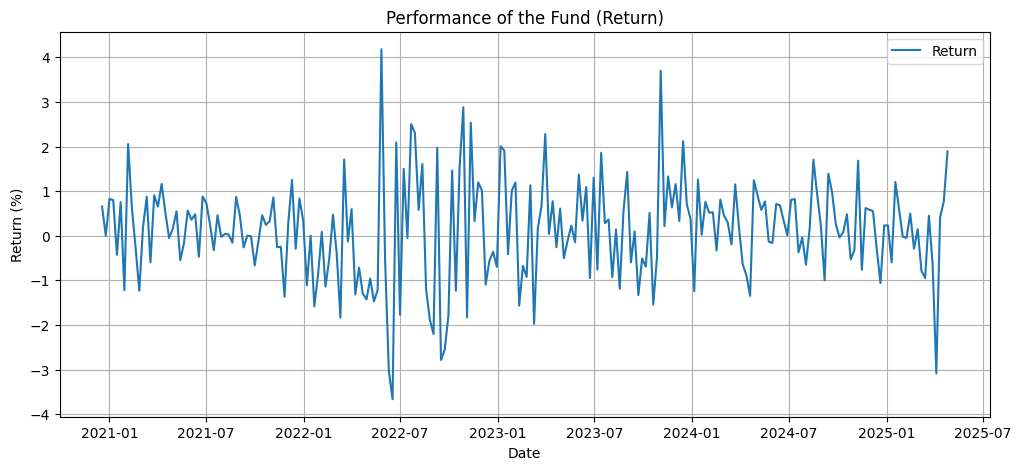

In [27]:
plt.figure(figsize=(12, 5))
plt.plot(df_risk_parity_2['Date'], df_risk_parity_2['Portfolio_Return'] * 100, '-', label='Return')
plt.title(f'Performance of the Fund (Return)')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()
plt.grid()
plt.show()

In [28]:
# Compute mean returns

print(f"For Equity: ")

df = df_risk_parity_2[(df_risk_parity_2['Date'] >= '2021-01-01')]
mean_return_2021_25 = df['Return_Equity'].mean()
print(f"Average Return from 2021 to Present: {mean_return_2021_25:.2%}")

df = df_risk_parity_2[(df_risk_parity_2['Date'] >= '2022-01-01') & 
                      (df_risk_parity_2['Date'] <= '2022-12-31')]
mean_return_2022 = df['Return_Equity'].mean()
print(f"Average Return in 2022: {mean_return_2022:.2%}")

df = df_risk_parity_2[(df_risk_parity_2['Date'] >= '2025-01-01')]
mean_return_2025 = df['Return_Equity'].mean()
print(f"Average Return in 2025: {mean_return_2025:.2%}")

# Create list of average returns
average_return = [
    mean_return_2021_25 * 100,
    mean_return_2022 * 100,
    mean_return_2025 * 100
]

# Create DataFrame with row labels and column name
df_average_return = pd.DataFrame(
    average_return,
    index=['2021–2025', '2022', '2025'],
    columns=['Return_Equities (%)']
)

display(df_average_return)


For Equity: 
Average Return from 2021 to Present: 0.23%
Average Return in 2022: -0.33%
Average Return in 2025: -0.38%


,Return_Equities (%)
2021–2025,0.232618
2022,-0.333596
2025,-0.378659


In [29]:
# Compute mean returns for bonds

print(f"For Bonds: ")

df = df_risk_parity_2[(df_risk_parity_2['Date'] >= '2021-01-01')]
mean_return_2021_25 = df['Return_Bond'].mean()
print(f"Average Return from 2021 to Present: {mean_return_2021_25:.2%}")

df = df_risk_parity_2[(df_risk_parity_2['Date'] >= '2022-01-01') & 
                      (df_risk_parity_2['Date'] <= '2022-12-31')]
mean_return_2022 = df['Return_Bond'].mean()
print(f"Average Return in 2022: {mean_return_2022:.2%}")

df = df_risk_parity_2[(df_risk_parity_2['Date'] >= '2025-01-01')]
mean_return_2025 = df['Return_Bond'].mean()
print(f"Average Return in 2025: {mean_return_2025:.2%}")

average_return = [
    mean_return_2021_25 * 100,
    mean_return_2022 * 100,
    mean_return_2025 * 100
]

df_average_return['Return_Bonds (%)'] = average_return
display(df_average_return)

For Bonds: 
Average Return from 2021 to Present: 0.07%
Average Return in 2022: -0.22%
Average Return in 2025: 0.07%


,Return_Equities (%),Return_Bonds (%)
2021–2025,0.232618,0.071560
2022,-0.333596,-0.219836
2025,-0.378659,0.072691


In [30]:
# Compute correlation

df = df_risk_parity_2[(df_risk_parity_2['Date'] >= '2021-01-01')]
correlation_2021_25 = df['Return_Equity'].corr(df['Return_Bond'])
print(f"Correlation from 2021 to Present: {correlation_2021_25:.2%}")

df = df_risk_parity_2[(df_risk_parity_2['Date'] >= '2022-01-01') & 
                      (df_risk_parity_2['Date'] <= '2022-12-31')]
correlation_2022 = df['Return_Equity'].corr(df['Return_Bond'])
print(f"Correlation in 2022: {correlation_2022:.2%}")

df = df_risk_parity_2[(df_risk_parity_2['Date'] >= '2025-01-01')]
correlation_2025 = df['Return_Equity'].corr(df['Return_Bond'])
print(f"Correlation in 2025: {correlation_2025:.2%}")

corr_list = [
    correlation_2021_25 * 100,
    correlation_2022 * 100,
    correlation_2025 * 100
]

df_average_return['Correlation (%)'] = corr_list
display(df_average_return)

Correlation from 2021 to Present: 70.40%
Correlation in 2022: 79.14%
Correlation in 2025: 57.82%


,Return_Equities (%),Return_Bonds (%),Correlation (%)
2021–2025,0.232618,0.071560,70.403608
2022,-0.333596,-0.219836,79.140186
2025,-0.378659,0.072691,57.817612
